## Objective
The main objective of the program demonstrate one of Unsupervised Machine Learning techniques called Clustering. We will be using Kmeans Algorithm to demonstrate clustering technique and will try to predict the optimum number of clusters in a given dataset.

## Clustering
<p>Clustering is one of the most common exploratory data analysis technique used to get an intuition about the structure of the data. It can be defined as the task of identifying subgroups in the data such that data points in the same subgroup (cluster) are very similar while data points in different clusters are very different. In other words, we try to find homogeneous subgroups within the data such that data points in each cluster are as similar as possible according to a similarity measure such as euclidean-based distance or correlation-based distance. The decision of which similarity measure to use is application-specific.</p>
<p>Clustering is considered an unsupervised learning method since we don’t have the ground truth to compare the output of the clustering algorithm to the true labels to evaluate its performance. We only want to try to investigate the structure of the data by grouping the data points into distinct subgroups.</p>
<p>Clustering is used in market segmentation; where we try to find customers that are similar to each other whether in terms of behaviors or attributes, image segmentation/compression; where we try to group similar regions together, document clustering based on topics, etc.</p>

## KMeans Algorithm
<p>Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.</p>
<p>The way kmeans algorithm works is as follows:</p>
<ul>
    <li>Specify number of clusters K.</li>
    <li>Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.</li>
    <li>Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.</li>
    <li>Compute the sum of the squared distance between data points and all centroids.</li>
    <li>Assign each data point to the closest cluster (centroid).</li>
    <li>Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.</li>
</ul>
<h4>Libraries Used to Implement the Objective</h4>
<ul>
    <li><b>SKLearn: </b>Scikit-learn is probably the most useful library for machine learning in Python. The sklearn library contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction.</li>
    <li><b>Numpy: </b>NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices. NumPy was created in 2005 by Travis Oliphant. It is an open source project and you can use it freely. NumPy stands for Numerical Python.</li>
    <li><b>Pandas: </b>Pandas is the most popular python library that is used for data analysis. It provides highly optimized performance with back-end source code is purely written in C or Python. We can analyze data in pandas with: Series.</li>
    <li><b>Matplotlib: </b>matplotlib. pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.</li>
</ul>

In [2]:
# Importing all of the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

In [3]:
# Load the iris dataset
dataset = datasets.load_iris()
iris_dataset = pd.DataFrame(dataset.data, columns = dataset.feature_names)
print("Data imported successfully.")
iris_dataset.head(10)

Data imported successfully.


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


#### Next, we have to find the value of K i.e. the optimum number of clusters for KMeans Algorithm and we are going to use the Elbow Method to find that.

## Elbow Method
<p>Elbow method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters’ centroids. We pick k at the spot where SSE starts to flatten out and forming an elbow. We’ll use the geyser dataset and evaluate SSE for different values of k and see where the curve might form an elbow and flatten out.</p>

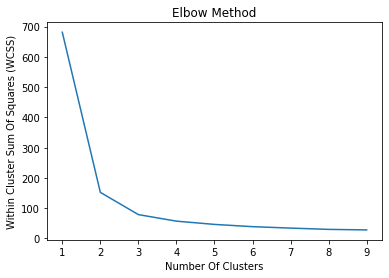

In [4]:
## find the value to K using the elbow method
iris_data_rows = iris_dataset.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
sse = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0)
    kmeans.fit(iris_data_rows)
    sse.append(kmeans.inertia_)

## plot the result on a line graph to observer the elbow and decide the value of k
plt.plot(range(1, 10), sse)
plt.title('Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('Within Cluster Sum Of Squares (WCSS)')
plt.show()

#### From the above graph we can conclude that K=3 is not a bad choice.

<h4>Code Explanation</h4>
<p><a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html" target="_blank">class sklearn.cluster.KMeans Documentation</a></p>
<ul>
    <li><b>iris_data_rows = iris_dataset.iloc[:, [0, 1, 2, 3]].values: </b>Get the data rows from the iris dataset available at first four index.</li>
    <li>
        <b>kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0): </b>
        Here we are creating an object of class sklearn.cluster.KMeans which is used to perform KMeans Clustering.
        <ol>
            <li><b>n_clusters = k: </b>The number of clusters to form as well as the number of centroids to generate.</li>
            <li><b>init = 'k-means++': </b>Method for initialization: ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details.</li>
            <li><b>random_state = 0: </b>Determines random number generation for centroid initialization.</li>
        </ol>
    </li>
    <li><b>kmeans.fit(iris_data_rows): </b>Here, we are computing the KMeans Clusturing for the available iris data rows.</li>
    <li><b>sse.append(kmeans.inertia_): </b>Here, we are storing the computed sum of squared distances of samples to their closest cluster center to an array/list.</li>
</ul>

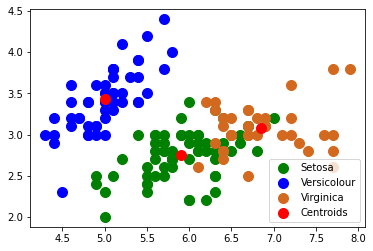

In [5]:
## applying k=3 to the iris dataset and creating kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
classifications = kmeans.fit_predict(iris_data_rows) ## Compute cluster centers and predict cluster index for each sample.

## visualizing the clusters
plt.scatter(iris_data_rows[classifications == 0, 0], iris_data_rows[classifications == 0, 1], s = 100, c = 'green', label = 'Setosa')
plt.scatter(iris_data_rows[classifications == 1, 0], iris_data_rows[classifications == 1, 1], s = 100, c = 'blue', label = 'Versicolour')
plt.scatter(iris_data_rows[classifications == 2, 0], iris_data_rows[classifications == 2, 1], s = 100, c = 'chocolate', label = 'Virginica')

## plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids')

## showing the graph with legend
plt.legend(loc = 'lower right')
plt.show()

<p><b>This concludes the objective.</b></p>

<h4><b>Author:</b> Shubhangi</h4>